In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
DATA_DIR = "data/Dataset.csv"
df=pd.read_csv(DATA_DIR)
df.head(100)


,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.00,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.50,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.00,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,58.18,0,1.0,0.0,-2.43,1,0,9891
96,1,1,119.0,98.0,NaN,137.0,87.00,NaN,NaN,NaN,...,NaN,NaN,58.18,0,1.0,0.0,-2.43,2,0,9891
97,2,2,120.0,97.0,NaN,151.0,95.00,NaN,NaN,NaN,...,NaN,NaN,58.18,0,1.0,0.0,-2.43,3,0,9891
98,3,3,116.0,97.0,36.0,153.0,84.33,NaN,NaN,NaN,...,NaN,NaN,58.18,0,1.0,0.0,-2.43,4,0,9891


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [4]:
null_values = df.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

Bilirubin_direct    99.807371
Fibrinogen          99.340167
TroponinI           99.047745
Bilirubin_total     98.509158
Alkalinephos        98.393194
AST                 98.377604
Lactate             97.329872
PTT                 97.055875
SaO2                96.549372
EtCO2               96.286843
Phosphate           95.986303
HCO3                95.810618
Chloride            95.460279
BaseExcess          94.579020
PaCO2               94.440121
Calcium             94.116067
Platelets           94.059502
Creatinine          93.904433
Magnesium           93.689578
WBC                 93.593199
BUN                 93.134434
pH                  93.069688
Hgb                 92.617558
FiO2                91.665754
Hct                 91.145979
Potassium           90.689082
Glucose             82.894325
Temp                66.162697
Unit2               39.425078
Unit1               39.425078
DBP                 31.345887
Resp                15.354559
SBP                 14.576958
O2Sat     


Missing values per column:


<AxesSubplot: >

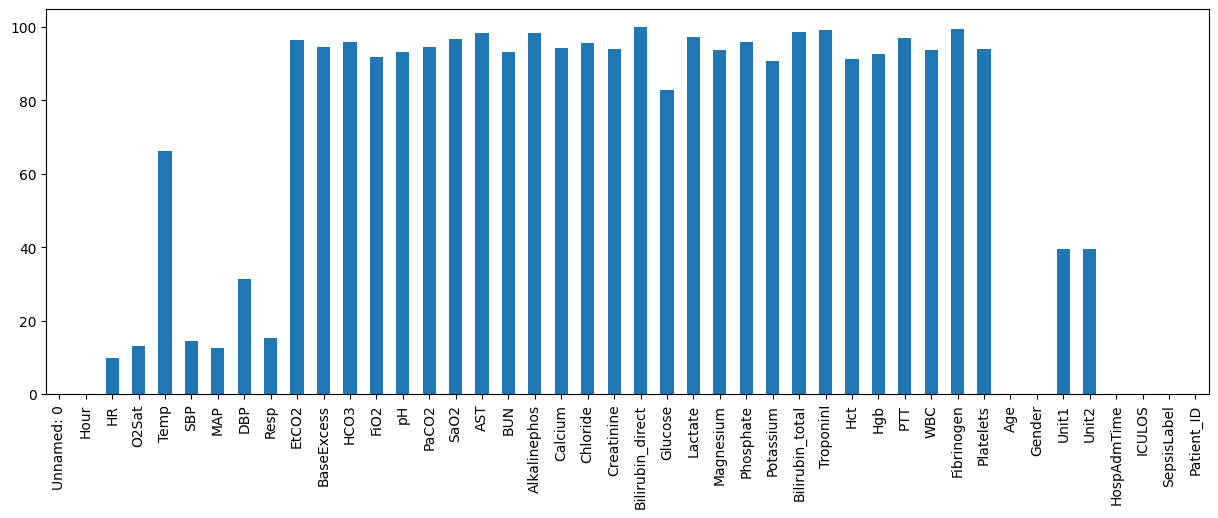

In [5]:
print("\nMissing values per column:")
round(100*(df.isnull().sum()/len(df.index)),2).plot.bar(figsize=(15,5))

In [6]:
df = df.assign(Unit=df['Unit1'] + df['Unit2'])

columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2','Chloride'}

df = df.drop(columns=columns_drop)


df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID', 'Unit'],
      dtype='object')

In [7]:
df.shape

(1552210, 27)

In [8]:
df_new = df.copy()
grouped_by_patient = df_new.groupby('Patient_ID')
df_new = grouped_by_patient.apply(lambda x: x.bfill().ffill())
display(df_new)

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_15620\1182119331.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_new = grouped_by_patient.apply(lambda x: x.bfill().ffill())


,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,35.78,42.5,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,35.78,74.0,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,35.78,74.0,14.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,83.0,99.0,36.70,77.0,22.0,NaN,NaN,NaN,17.0,...,10.3,5.7,260.0,88.00,0,-2.93,22,0,113911,1.0
1552206,22,80.0,92.0,36.70,73.0,24.0,NaN,NaN,NaN,17.0,...,10.3,5.7,260.0,88.00,0,-2.93,23,0,113911,1.0
1552207,23,95.0,97.0,36.70,83.0,25.0,NaN,NaN,NaN,17.0,...,10.3,5.7,260.0,88.00,0,-2.93,24,0,113911,1.0
1552208,24,104.0,99.0,36.70,85.0,24.0,NaN,NaN,NaN,17.0,...,10.3,5.7,260.0,88.00,0,-2.93,25,0,113911,1.0


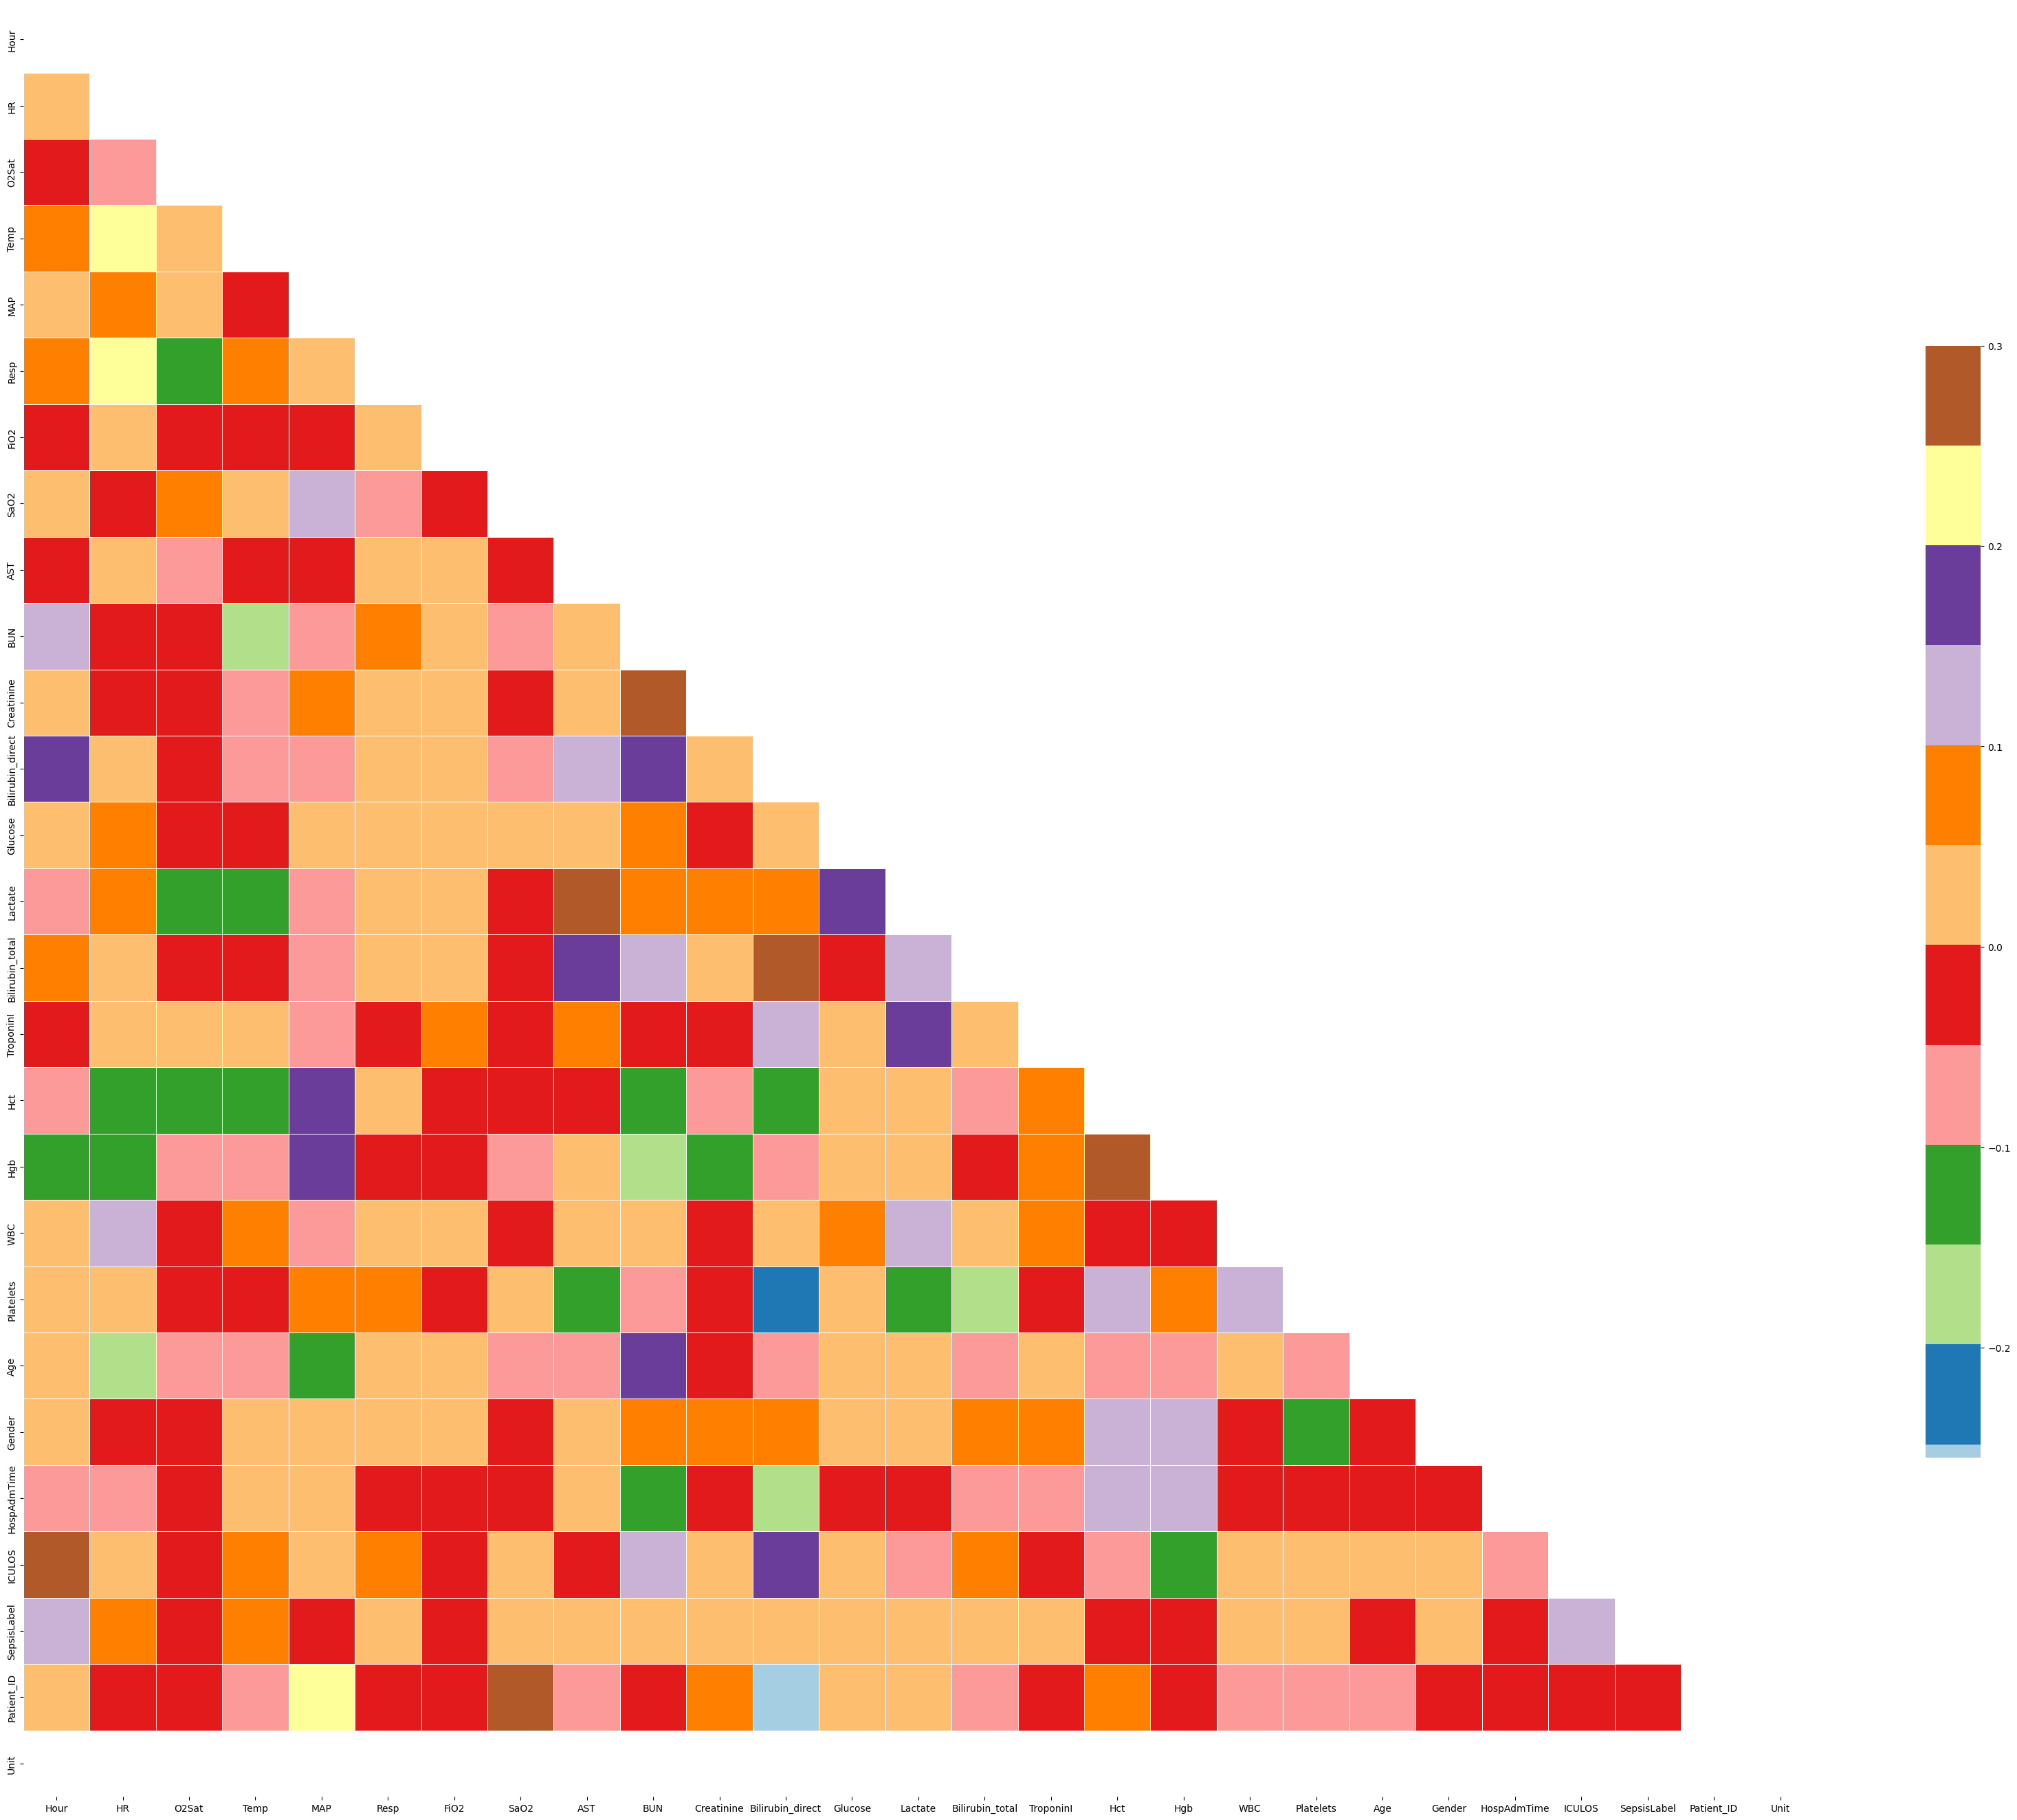

In [9]:
def corr_matrix(df):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(42,42))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  
corr_matrix(df_new)

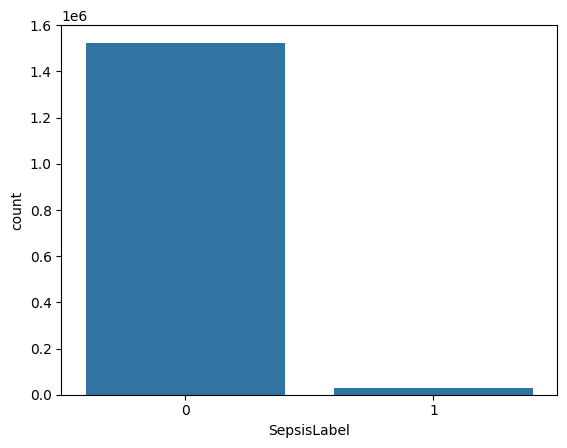

In [10]:
sns.countplot(x="SepsisLabel", data=df_new)
plt.show()

In [11]:
df_train_impute = df_new.copy()
columns_impute = list(df_train_impute.columns)

TESTING IMPUTATUONS

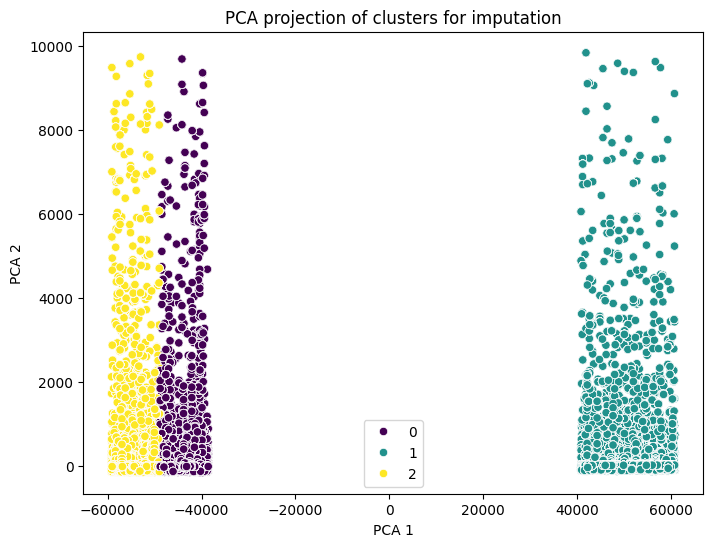

In [102]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your original DataFrame with missing values
df = df_new.copy()

# Step 1: Temporary imputation for clustering (mean)
temp_imputer = SimpleImputer(strategy='mean')
df_imputed_temp = pd.DataFrame(temp_imputer.fit_transform(df), columns=df.columns)

# Step 2: PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_imputed_temp)

# Step 3: Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_imputed_temp)

# Step 4: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette="viridis")
plt.title("PCA projection of clusters for imputation")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Step 5: Cluster-based imputation
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

for feature in df.columns:
    if df[feature].isnull().any():
        for cluster in df_clustered['Cluster'].unique():
            cluster_mask = df_clustered['Cluster'] == cluster
            median_val = df_clustered.loc[cluster_mask, feature].median()
            df_clustered.loc[cluster_mask & df_clustered[feature].isnull(), feature] = median_val

# Drop the Cluster column after imputation if needed
df_clustered.drop(columns='Cluster', inplace=True)


In [104]:
df_clustered

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,97.0,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,1.0
1,1,65.0,100.0,35.78,72.0,16.5,0.4,97.0,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,1.0
2,2,78.0,100.0,35.78,42.5,17.0,0.4,97.0,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,1.0
3,3,73.0,100.0,35.78,74.0,17.0,0.4,97.0,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,1.0
4,4,70.0,100.0,35.78,74.0,14.0,0.4,97.0,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,83.0,99.0,36.70,77.0,22.0,0.4,97.4,29.0,17.0,...,10.3,5.7,260.0,88.00,0,-2.93,22,0,113911,1.0
1552206,22,80.0,92.0,36.70,73.0,24.0,0.4,97.4,29.0,17.0,...,10.3,5.7,260.0,88.00,0,-2.93,23,0,113911,1.0
1552207,23,95.0,97.0,36.70,83.0,25.0,0.4,97.4,29.0,17.0,...,10.3,5.7,260.0,88.00,0,-2.93,24,0,113911,1.0
1552208,24,104.0,99.0,36.70,85.0,24.0,0.4,97.4,29.0,17.0,...,10.3,5.7,260.0,88.00,0,-2.93,25,0,113911,1.0


TESTING OVER

In [12]:
grouped_by_patient = df_train_impute.groupby('Patient_ID')
df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_15620\773179487.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())


In [13]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,35.78,42.5,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,35.78,74.0,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,35.78,74.0,14.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [14]:
null_values = df_train_impute.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

Bilirubin_direct    93.266633
TroponinI           81.905412
Lactate             63.533607
SaO2                62.980589
Bilirubin_total     59.799447
AST                 59.567520
FiO2                50.224390
Unit                39.425078
WBC                  4.227456
Platelets            4.150598
Hgb                  3.963317
Hct                  3.786472
Creatinine           3.275459
BUN                  3.233583
Glucose              2.708783
Temp                 0.478672
MAP                  0.173817
Resp                 0.128784
O2Sat                0.024095
HR                   0.009148
HospAdmTime          0.000515
Age                  0.000000
Gender               0.000000
ICULOS               0.000000
SepsisLabel          0.000000
Patient_ID           0.000000
Hour                 0.000000
dtype: float64

In [15]:
null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit', 'Patient_ID']
df_train_impute = df_train_impute.drop(columns=null_col)
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Creatinine',
       'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age', 'Gender',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [17]:
df_train_impute

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,0,65.0,100.0,35.78,72.0,16.5,23.0,0.80,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,1,0
1,1,65.0,100.0,35.78,72.0,16.5,23.0,0.80,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,2,0
2,2,78.0,100.0,35.78,42.5,17.0,23.0,0.80,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,3,0
3,3,73.0,100.0,35.78,74.0,17.0,23.0,0.80,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,4,0
4,4,70.0,100.0,35.78,74.0,14.0,23.0,0.80,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,83.0,99.0,36.70,77.0,22.0,17.0,0.37,163.0,33.8,10.3,5.7,260.0,88.00,0,-2.93,22,0
1552206,22,80.0,92.0,36.70,73.0,24.0,17.0,0.37,163.0,33.8,10.3,5.7,260.0,88.00,0,-2.93,23,0
1552207,23,95.0,97.0,36.70,83.0,25.0,17.0,0.37,163.0,33.8,10.3,5.7,260.0,88.00,0,-2.93,24,0
1552208,24,104.0,99.0,36.70,85.0,24.0,17.0,0.37,163.0,33.8,10.3,5.7,260.0,88.00,0,-2.93,25,0


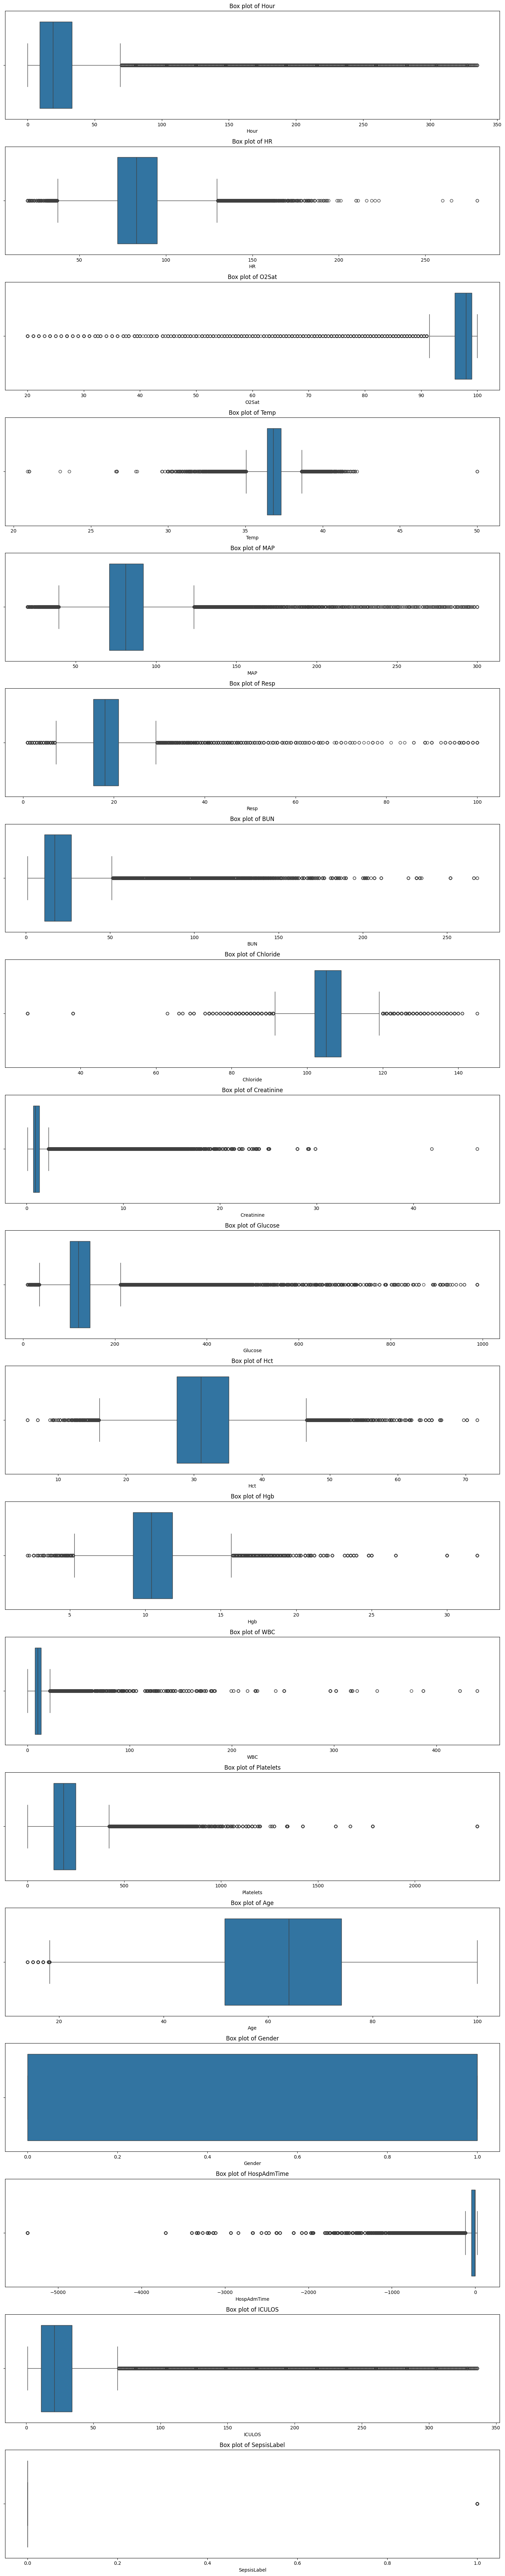

In [ ]:


# Select numeric columns from the DataFrame
numeric_cols = df_train_impute.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(numeric_cols) * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df_train_impute[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [18]:
# Calculate the first and third quartiles for each numerical column
Q1 = df_train_impute.quantile(0.25)
Q3 = df_train_impute.quantile(0.75)
IQR = Q3 - Q1

# Define the "outlier" condition for rows: any value less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR
outlier_condition = (df_train_impute < (Q1 - 1.5 * IQR)) | (df_train_impute > (Q3 + 1.5 * IQR))

# Filter rows with at least one outlier in any column
df_outliers = df_train_impute[outlier_condition.any(axis=1)]

print("Rows with outliers:")
print(df_outliers.head())

Rows with outliers:
    Hour     HR  O2Sat   Temp    MAP  Resp   BUN  Creatinine  Glucose   Hct  \
67     8   77.0   98.0  36.56  77.67  33.0  27.0         0.8     87.0  29.6   
95     0  119.0   98.0  36.00  87.00  26.0  11.0         0.9    426.0  33.3   
96     1  119.0   98.0  36.00  87.00  26.0  11.0         0.9    426.0  33.3   
97     2  120.0   97.0  36.00  95.00  26.0  11.0         0.9    426.0  33.3   
98     3  116.0   97.0  36.00  84.33  26.0  11.0         0.9    426.0  33.3   

     Hgb  WBC  Platelets    Age  Gender  HospAdmTime  ICULOS  SepsisLabel  
67   9.9  7.0      129.0  85.57       0        -0.03       9            0  
95  11.0  9.0      461.0  58.18       0        -2.43       1            0  
96  11.0  9.0      461.0  58.18       0        -2.43       2            0  
97  11.0  9.0      461.0  58.18       0        -2.43       3            0  
98  11.0  9.0      461.0  58.18       0        -2.43       4            0  


In [19]:
df_outliers

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
67,8,77.0,98.0,36.56,77.67,33.0,27.0,0.80,87.0,29.6,9.9,7.0,129.0,85.57,0,-0.03,9,0
95,0,119.0,98.0,36.00,87.00,26.0,11.0,0.90,426.0,33.3,11.0,9.0,461.0,58.18,0,-2.43,1,0
96,1,119.0,98.0,36.00,87.00,26.0,11.0,0.90,426.0,33.3,11.0,9.0,461.0,58.18,0,-2.43,2,0
97,2,120.0,97.0,36.00,95.00,26.0,11.0,0.90,426.0,33.3,11.0,9.0,461.0,58.18,0,-2.43,3,0
98,3,116.0,97.0,36.00,84.33,26.0,11.0,0.90,426.0,33.3,11.0,9.0,461.0,58.18,0,-2.43,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552186,2,103.0,99.0,36.50,80.00,28.0,17.0,0.37,234.0,33.8,10.3,5.7,260.0,88.00,0,-2.93,3,0
1552187,3,99.0,100.0,36.50,78.00,35.0,17.0,0.37,234.0,33.8,10.3,5.7,260.0,88.00,0,-2.93,4,0
1552188,4,98.5,97.0,36.50,82.00,32.0,17.0,0.37,234.0,33.8,10.3,5.7,260.0,88.00,0,-2.93,5,0
1552189,5,102.0,97.0,36.40,91.00,30.0,17.0,0.37,234.0,33.8,10.3,5.7,260.0,88.00,0,-2.93,6,0


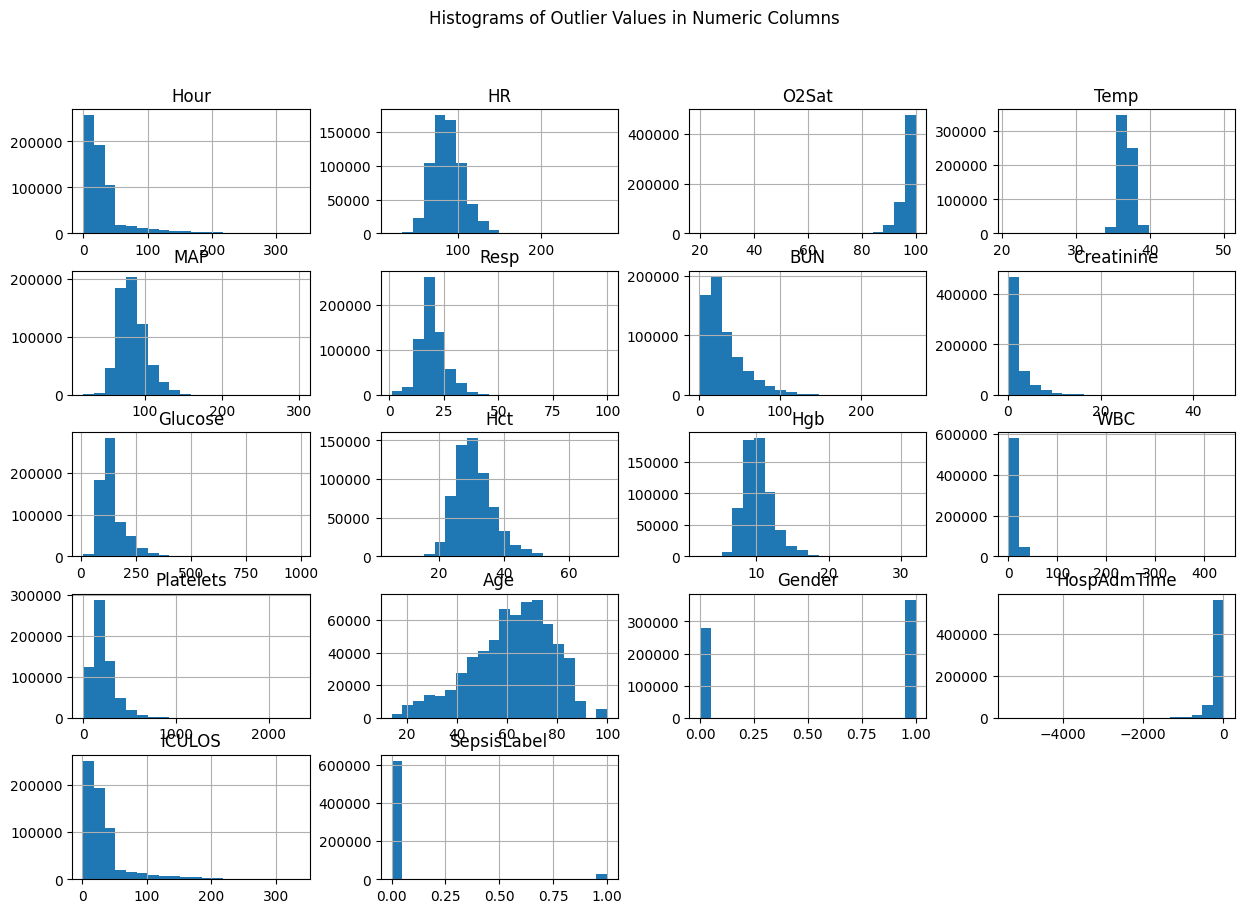

In [20]:


# Select numeric columns from df_outliers
numeric_cols = df_outliers.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for the selected numeric columns
df_outliers[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Outlier Values in Numeric Columns")
plt.show()


C:\Users\Jayesh\AppData\Local\Temp\ipykernel_15620\2964640410.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers[col] = np.log1p(df_outliers[col])
C:\Users\Jayesh\AppData\Local\Temp\ipykernel_15620\2964640410.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers[col] = np.log1p(df_outliers[col] + shift)


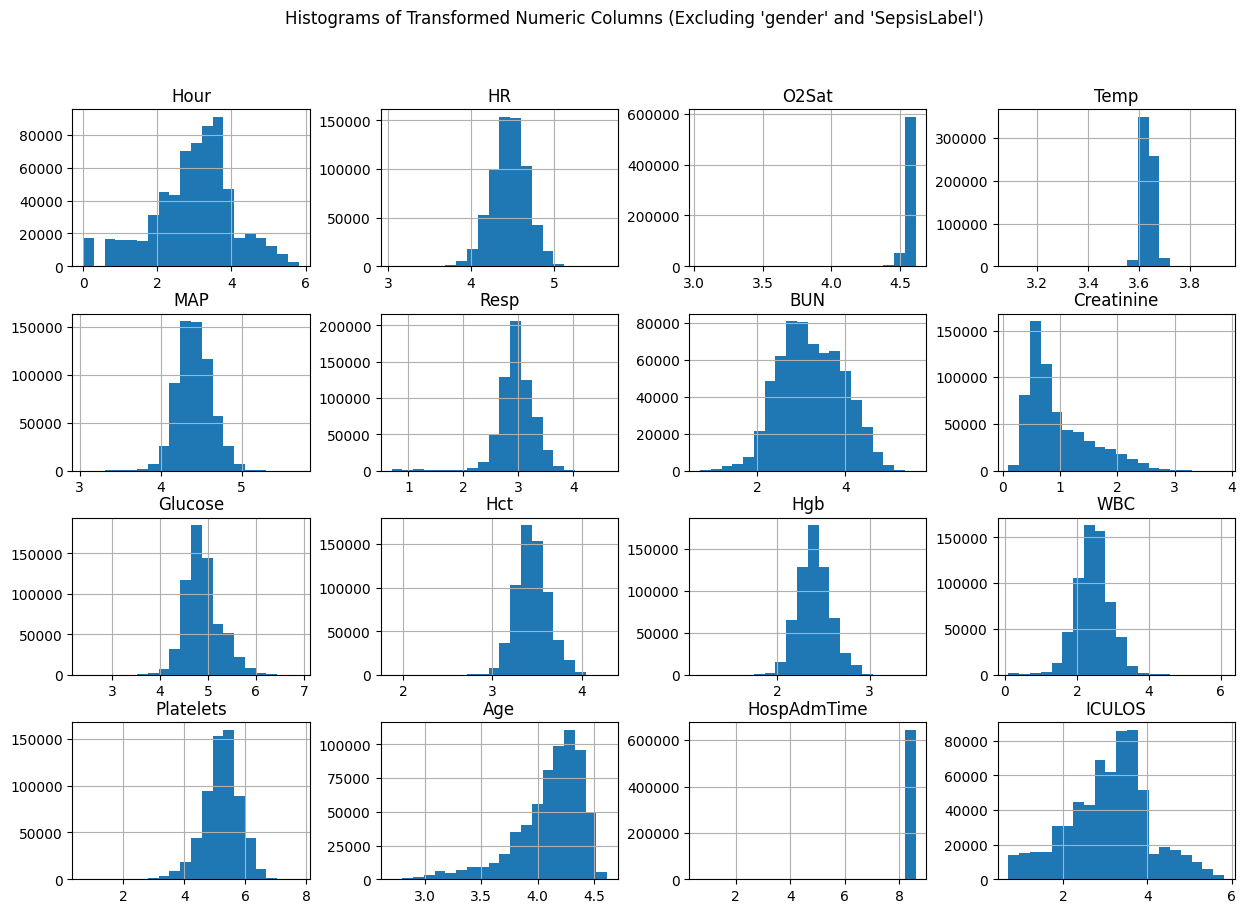

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve numeric columns
numeric_cols = df_outliers.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'gender' and 'SepsisLabel' from transformation
cols_to_transform = [col for col in numeric_cols if col not in ['Gender', 'SepsisLabel']]

# Fix skew by applying a log transform with shifting if necessary
for col in cols_to_transform:
    if df_outliers[col].min() < 0:
        shift = abs(df_outliers[col].min()) + 1
        df_outliers[col] = np.log1p(df_outliers[col] + shift)
    else:
        df_outliers[col] = np.log1p(df_outliers[col])

# Plot histograms for the transformed numeric columns
df_outliers[cols_to_transform].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Transformed Numeric Columns (Excluding 'gender' and 'SepsisLabel')")
plt.show()

In [22]:
majority_class = df_outliers[df_outliers['SepsisLabel'] == 0]
minority_class = df_outliers[df_outliers['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 27916
while number of sepsis label 0 is 619144


In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a copy to hold normalized data
df_normalized = df_outliers.copy()

# Retrieve numeric columns
numeric_cols = df_normalized.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'gender' and 'SepsisLabel' from normalization
cols_to_normalize = [col for col in numeric_cols if col not in ['Gender', 'SepsisLabel']]

# Initialize StandardScaler and transform the selected columns
scaler = StandardScaler()
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# Optionally, display the first few rows to verify normalization
df_normalized.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
67,-0.711949,-0.476444,0.271382,-0.334156,-0.238974,1.596283,0.147729,-0.694069,-1.113622,-0.134247,-0.077723,-0.760217,-0.593163,1.182793,0,0.150046,-0.807125,0
95,-2.703496,1.538437,0.271382,-1.014491,0.283676,0.934859,-1.038365,-0.595023,3.166081,0.495809,0.463745,-0.306561,1.521968,-0.075846,0,0.147339,-2.444086,0
96,-2.075233,1.538437,0.271382,-1.014491,0.283676,0.934859,-1.038365,-0.595023,3.166081,0.495809,0.463745,-0.306561,1.521968,-0.075846,0,0.147339,-2.031687,0
97,-1.707723,1.577253,0.072733,-1.014491,0.689444,0.934859,-1.038365,-0.595023,3.166081,0.495809,0.463745,-0.306561,1.521968,-0.075846,0,0.147339,-1.739085,0
98,-1.446970,1.420020,0.072733,-1.014491,0.139993,0.934859,-1.038365,-0.595023,3.166081,0.495809,0.463745,-0.306561,1.521968,-0.075846,0,0.147339,-1.512126,0


In [ ]:
# majority_class_subset = majority_class.sample(n=2*len(minority_class))
# df_train_impute = pd.concat([majority_class_subset, minority_class])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, confusion_matrix

def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [39]:
missing_counts = df_outliers.isnull().sum()
print("Missing values per column:")
print(missing_counts)

Missing values per column:
Hour               0
HR                 5
O2Sat             85
Temp            2808
MAP              748
Resp            1081
BUN            12317
Creatinine     12478
Glucose         9171
Hct            15302
Hgb            16253
WBC            17284
Platelets      17130
Age                0
Gender             0
HospAdmTime        1
ICULOS             0
SepsisLabel        0
dtype: int64


In [26]:
df_no_na = df_outliers.dropna()
print("Shape before dropping NAs:", df_outliers.shape)
print("Shape after dropping NAs:", df_no_na.shape)

Shape before dropping NAs: (647060, 18)
Shape after dropping NAs: (623239, 18)


In [27]:
df_no_na

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
67,2.197225,4.356709,4.595120,3.625940,4.365262,3.526361,3.332205,0.587787,4.477337,3.421000,2.388763,2.079442,4.867534,4.460953,0,8.588365,2.302585,0
95,0.000000,4.787492,4.595120,3.610918,4.477337,3.295837,2.484907,0.641854,6.056784,3.535145,2.484907,2.302585,6.135565,4.080584,0,8.587918,0.693147,0
96,0.693147,4.787492,4.595120,3.610918,4.477337,3.295837,2.484907,0.641854,6.056784,3.535145,2.484907,2.302585,6.135565,4.080584,0,8.587918,1.098612,0
97,1.098612,4.795791,4.584967,3.610918,4.564348,3.295837,2.484907,0.641854,6.056784,3.535145,2.484907,2.302585,6.135565,4.080584,0,8.587918,1.386294,0
98,1.386294,4.762174,4.584967,3.610918,4.446526,3.295837,2.484907,0.641854,6.056784,3.535145,2.484907,2.302585,6.135565,4.080584,0,8.587918,1.609438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552186,1.098612,4.644391,4.605170,3.624341,4.394449,3.367296,2.890372,0.314811,5.459586,3.549617,2.424803,1.902108,5.564520,4.488636,0,8.587825,1.386294,0
1552187,1.386294,4.605170,4.615121,3.624341,4.369448,3.583519,2.890372,0.314811,5.459586,3.549617,2.424803,1.902108,5.564520,4.488636,0,8.587825,1.609438,0
1552188,1.609438,4.600158,4.584967,3.624341,4.418841,3.496508,2.890372,0.314811,5.459586,3.549617,2.424803,1.902108,5.564520,4.488636,0,8.587825,1.791759,0
1552189,1.791759,4.634729,4.584967,3.621671,4.521789,3.433987,2.890372,0.314811,5.459586,3.549617,2.424803,1.902108,5.564520,4.488636,0,8.587825,1.945910,0


In [97]:
df_no_na=df_no_na.drop(columns=['HospAdmTime','Hour'])

In [98]:
from imblearn.over_sampling import SMOTE
import pandas as pd

def balance_dataset(df, target_col='SepsisLabel', major_n=80000, minor_target=80000, random_state=42):
    # 1. Split majority and minority classes
    df_major = df[df[target_col] == 0]
    df_minor = df[df[target_col] == 1]
    
    # 2. Downsample majority class to major_n samples
    df_major_downsampled = df_major.sample(n=major_n, random_state=random_state)
    
    # 3. Combine with all of minority class
    df_combined = pd.concat([df_minor, df_major_downsampled], axis=0)
    
    # 4. Separate features and target
    X = df_combined.drop(columns=[target_col])
    y = df_combined[target_col]
    
    # 5. Apply SMOTE to balance minority class up to minor_target samples
    sm = SMOTE(sampling_strategy={1: minor_target}, random_state=random_state)
    X_resampled, y_resampled = sm.fit_resample(X, y)
    
    # 6. Combine back into a DataFrame
    df_balanced = pd.concat(
        [pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_col)],
        axis=1
    )
    return df_balanced

# Example usage:
df_balanced = balance_dataset(df_no_na)
print(df_balanced['SepsisLabel'].value_counts())

1    80000
0    80000
Name: SepsisLabel, dtype: int64


In [99]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_balanced.drop(columns=['SepsisLabel'])
y = df_balanced['SepsisLabel']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (128000, 15)
Training labels shape: (128000,)
Testing features shape: (32000, 15)
Testing labels shape: (32000,)


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize RandomForestClassifier with class_weight set to 'balanced'
rf = RandomForestClassifier(n_estimators=300,class_weight='balanced', random_state=42)

# Train the model using the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.97834375

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     16044
           1       0.97      0.99      0.98     15956

    accuracy                           0.98     32000
   macro avg       0.98      0.98      0.98     32000
weighted avg       0.98      0.98      0.98     32000



Accuracy: 0.98028125
Precision: 0.9731982955598097
Recall: 0.9876535472549511
F1 Score: 0.9803726398954866
AUC-ROC: 0.9803014682173534
Mean Absolute Error: 0.01971875
Root Mean Squared Error: 0.14042346669983619


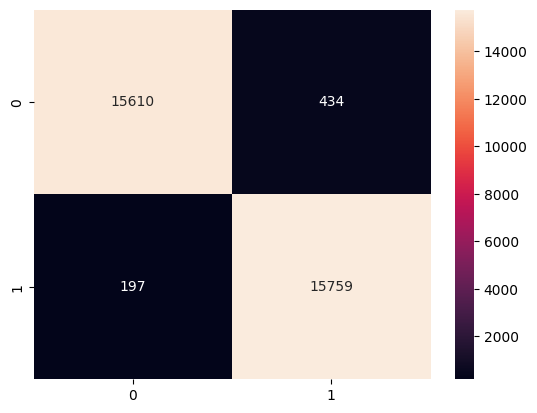

In [31]:
evaluate_model(y_test, y_pred)

Accuracy: 0.91825
Precision: 0.9136690647482014
Recall: 0.9232890448734019
F1 Score: 0.9184538653366584
AUC-ROC: 0.918263819370134
Mean Absolute Error: 0.08175
Root Mean Squared Error: 0.28591956910991595


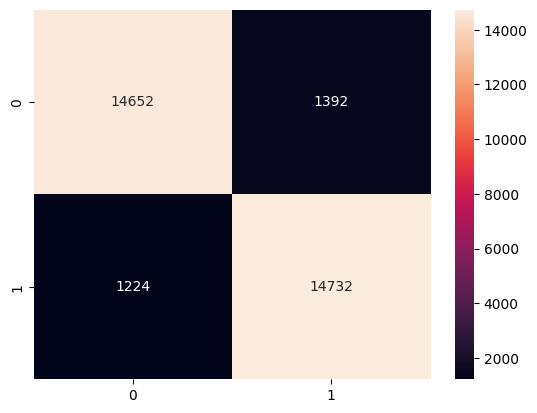

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_y_pred = xgb_model.predict(X_test)
evaluate_model(y_test, xgb_y_pred)

Decision Tree Test Accuracy: 0.93821875
Accuracy: 0.93821875
Precision: 0.9194119411941194
Recall: 0.9602657307595889
F1 Score: 0.9393948683363478
AUC-ROC: 0.9382792129240478
Mean Absolute Error: 0.06178125
Root Mean Squared Error: 0.2485583432516398


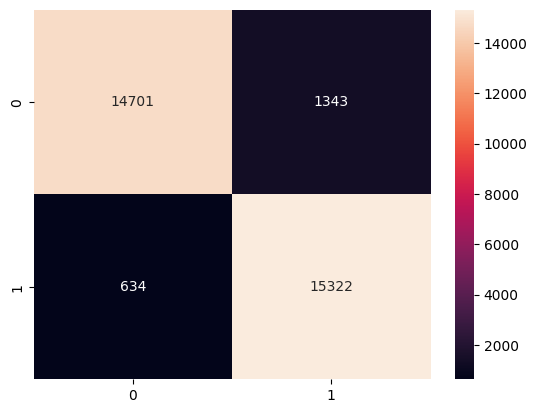

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Test Accuracy:", dt_accuracy)
evaluate_model(y_test, dt_y_pred)

Logistic Regression Test Accuracy: 0.65990625
Accuracy: 0.65990625
Precision: 0.6564678304854729
Recall: 0.6669591376284784
F1 Score: 0.6616718997730593
AUC-ROC: 0.6599255922497913
Mean Absolute Error: 0.34009375
Root Mean Squared Error: 0.583175573905492


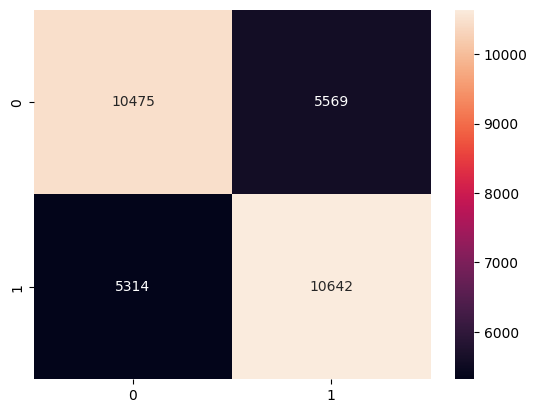

In [34]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Test Accuracy:", lr_accuracy)
evaluate_model(y_test, lr_y_pred)

c:\Users\Jayesh\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
c:\Users\Jayesh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/30, Train Loss: 0.6494, Val Loss: 0.6393
Epoch 2/30, Train Loss: 0.6382, Val Loss: 0.6401
Epoch 3/30, Train Loss: 0.6345, Val Loss: 0.6296
Epoch 4/30, Train Loss: 0.6317, Val Loss: 0.6318
Epoch 5/30, Train Loss: 0.6282, Val Loss: 0.6227
Epoch 6/30, Train Loss: 0.6253, Val Loss: 0.6204
Epoch 7/30, Train Loss: 0.6228, Val Loss: 0.6283
Epoch 8/30, Train Loss: 0.6217, Val Loss: 0.6222
Epoch 9/30, Train Loss: 0.6197, Val Loss: 0.6161
Epoch 10/30, Train Loss: 0.6184, Val Loss: 0.6159
Epoch 11/30, Train Loss: 0.6167, Val Loss: 0.6149
Epoch 12/30, Train Loss: 0.6160, Val Loss: 0.6147
Epoch 13/30, Train Loss: 0.6153, Val Loss: 0.6303
Epoch 14/30, Train Loss: 0.6139, Val Loss: 0.6133
Epoch 15/30, Train Loss: 0.6128, Val Loss: 0.6110
Epoch 16/30, Train Loss: 0.6123, Val Loss: 0.6102
Epoch 17/30, Train Loss: 0.6114, Val Loss: 0.6094
Epoch 18/30, Train Loss: 0.6112, Val Loss: 0.6079
Epoch 19/30, Train Loss: 0.6105, Val Loss: 0.6091
Epoch 20/30, Train Loss: 0.6089, Val Loss: 0.6082
Epoch 21/

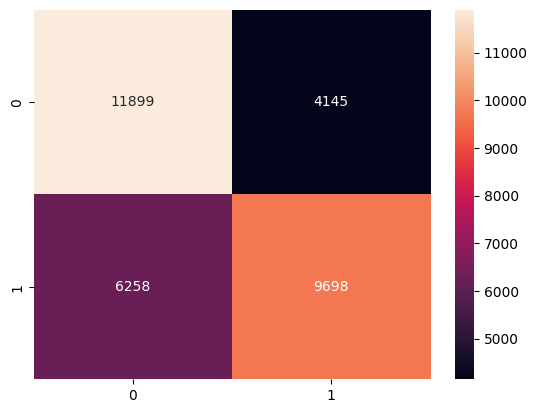

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation function


# Convert data
X_train_tensor = torch.tensor(X_train.values if hasattr(X_train, "values") else X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values if hasattr(y_train, "values") else y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values if hasattr(X_test, "values") else X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values if hasattr(y_test, "values") else y_test, dtype=torch.float32)

# Reshape for sequential input
X_train_tensor = X_train_tensor.unsqueeze(1)
X_test_tensor = X_test_tensor.unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# GRU + Attention model
class GRU_Attention(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=1, dropout=0.2):
        super(GRU_Attention, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, dropout=dropout, bidirectional=True)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        gru_out, _ = self.gru(x)  # shape: (batch, seq_len, hidden_dim*2)
        attn_weights = torch.softmax(self.attention(gru_out), dim=1)
        context = torch.sum(attn_weights * gru_out, dim=1)  # weighted sum
        out = self.dropout(context)
        return self.fc(out)

# Initialize model
input_dim = X_train_tensor.shape[2]
model = GRU_Attention(input_dim=input_dim)

# Training setup
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

# Early stopping
patience = 5
best_val_loss = float('inf')
early_stop_counter = 0

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_losses = []
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb).squeeze()
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    val_pred = model(X_test_tensor).squeeze()
    val_loss = criterion(val_pred, y_test_tensor).item()
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {np.mean(train_losses):.4f}, Val Loss: {val_loss:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break

# Load best model
model.load_state_dict(best_model_state)

# Evaluate
model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor).squeeze()
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs > 0.5).float().numpy()

evaluate_model(y_test_tensor.numpy(), test_preds)


0:	learn: 0.6721694	test: 0.6725694	best: 0.6725694 (0)	total: 12.8ms	remaining: 38.5s
10:	learn: 0.5764416	test: 0.5775341	best: 0.5775341 (10)	total: 166ms	remaining: 45s
20:	learn: 0.5398650	test: 0.5410001	best: 0.5410001 (20)	total: 344ms	remaining: 48.8s
30:	learn: 0.5114358	test: 0.5128914	best: 0.5128914 (30)	total: 501ms	remaining: 48s
40:	learn: 0.4920111	test: 0.4932900	best: 0.4932900 (40)	total: 649ms	remaining: 46.9s
50:	learn: 0.4725242	test: 0.4734191	best: 0.4734191 (50)	total: 805ms	remaining: 46.6s
60:	learn: 0.4576485	test: 0.4584881	best: 0.4584881 (60)	total: 968ms	remaining: 46.6s
70:	learn: 0.4449376	test: 0.4462281	best: 0.4462281 (70)	total: 1.12s	remaining: 46.1s
80:	learn: 0.4344108	test: 0.4359167	best: 0.4359167 (80)	total: 1.27s	remaining: 45.8s
90:	learn: 0.4207138	test: 0.4224077	best: 0.4224077 (90)	total: 1.42s	remaining: 45.3s
100:	learn: 0.4054205	test: 0.4072187	best: 0.4072187 (100)	total: 1.56s	remaining: 44.9s
110:	learn: 0.3833316	test: 0.38453

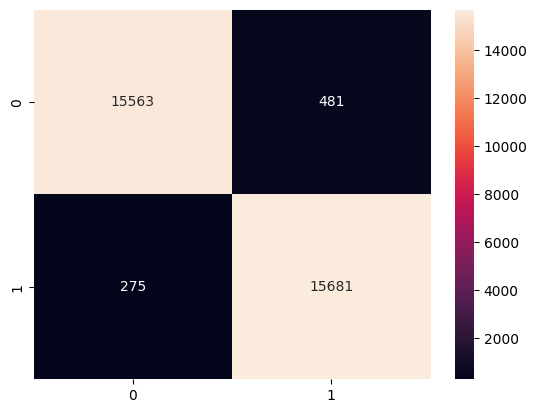

In [66]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=3000,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    verbose=10,
    random_seed=42
)

# Train CatBoost on the autoencoder embeddings
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions on the test embeddings
y_cat_pred = cat_model.predict(X_test)

# Evaluate the model's performance
evaluate_model(y_test, y_cat_pred)

Epoch 1/250 - Train Loss: 17.4570, Val Loss: 16.2201
Epoch 2/250 - Train Loss: 16.2195, Val Loss: 15.0761
Epoch 3/250 - Train Loss: 15.0754, Val Loss: 13.9904
Epoch 4/250 - Train Loss: 13.9895, Val Loss: 12.8921
Epoch 5/250 - Train Loss: 12.8910, Val Loss: 11.7446
Epoch 6/250 - Train Loss: 11.7434, Val Loss: 10.5269
Epoch 7/250 - Train Loss: 10.5254, Val Loss: 9.2550
Epoch 8/250 - Train Loss: 9.2534, Val Loss: 7.9316
Epoch 9/250 - Train Loss: 7.9297, Val Loss: 6.5687
Epoch 10/250 - Train Loss: 6.5667, Val Loss: 5.2258
Epoch 11/250 - Train Loss: 5.2236, Val Loss: 3.9830
Epoch 12/250 - Train Loss: 3.9807, Val Loss: 2.9432
Epoch 13/250 - Train Loss: 2.9408, Val Loss: 2.2174
Epoch 14/250 - Train Loss: 2.2150, Val Loss: 1.8795
Epoch 15/250 - Train Loss: 1.8773, Val Loss: 1.8872
Epoch 16/250 - Train Loss: 1.8851, Val Loss: 2.0436
Epoch 17/250 - Train Loss: 2.0417, Val Loss: 2.1134
Epoch 18/250 - Train Loss: 2.1117, Val Loss: 1.9658
Epoch 19/250 - Train Loss: 1.9641, Val Loss: 1.6310
Epoch 20

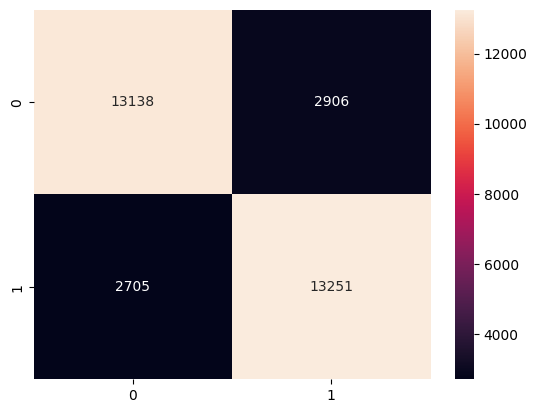

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, confusion_matrix
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ================== EVALUATION FUNCTION ================== #

def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
# ================== DATA PREP ================== #
X_train_auto, X_val_auto, y_train_auto, y_val_auto = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

X_tensor = torch.tensor(X_train_auto.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_auto.values, dtype=torch.float32)

# ================== AUTOENCODER ================== #
class Autoencoder(nn.Module):
    def __init__(self, input_dim, embedding_dim=64):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, embedding_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = X_tensor.shape[1]
model = Autoencoder(input_dim, embedding_dim=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ================== TRAIN AUTOENCODER ================== #
num_epochs = 250
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, X_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, X_val_tensor).item()
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}")

# ================== EXTRACT EMBEDDINGS ================== #
with torch.no_grad():
    X_train_embed = model.encoder(torch.tensor(X_train.values, dtype=torch.float32)).numpy()
    X_test_embed = model.encoder(torch.tensor(X_test.values, dtype=torch.float32)).numpy()

# ================== XGBOOST CLASSIFIER ================== #
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_embed, y_train)
y_pred = xgb_model.predict(X_test_embed)

# ================== EVALUATION ================== #
evaluate_model(y_test, y_pred)


epoch 0  | loss: 0.63453 | test_accuracy: 0.50313 |  0:00:09s
epoch 1  | loss: 0.58965 | test_accuracy: 0.52328 |  0:00:16s
epoch 2  | loss: 0.57769 | test_accuracy: 0.588   |  0:00:25s
epoch 3  | loss: 0.5697  | test_accuracy: 0.65684 |  0:00:35s
epoch 4  | loss: 0.56263 | test_accuracy: 0.71197 |  0:00:47s
epoch 5  | loss: 0.56098 | test_accuracy: 0.70078 |  0:00:55s
epoch 6  | loss: 0.56011 | test_accuracy: 0.71591 |  0:01:03s
epoch 7  | loss: 0.55443 | test_accuracy: 0.72438 |  0:01:11s
epoch 8  | loss: 0.55431 | test_accuracy: 0.70894 |  0:01:20s
epoch 9  | loss: 0.56358 | test_accuracy: 0.69259 |  0:01:27s
epoch 10 | loss: 0.56225 | test_accuracy: 0.71069 |  0:01:36s
epoch 11 | loss: 0.55201 | test_accuracy: 0.72944 |  0:01:46s
epoch 12 | loss: 0.55297 | test_accuracy: 0.71688 |  0:01:55s
epoch 13 | loss: 0.54805 | test_accuracy: 0.70562 |  0:02:04s
epoch 14 | loss: 0.53996 | test_accuracy: 0.72972 |  0:02:11s
epoch 15 | loss: 0.54026 | test_accuracy: 0.72059 |  0:02:20s
epoch 16

c:\Users\Jayesh\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.7728125
Precision: 0.7755710659898477
Recall: 0.7660441213336676
F1 Score: 0.7707781561357043
AUC-ROC: 0.7727939380041562
MAE: 0.2271875
RMSE: 0.47664189912344046


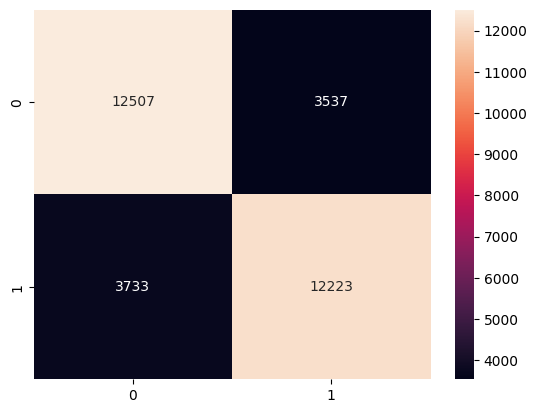

In [63]:
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ================== EVALUATION FUNCTION ================== #
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

# ================== DATA PREPARATION ================== #
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

# ================== TABNET CLASSIFIER ================== #
tabnet_model = TabNetClassifier()

tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_name=['test'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# ================== PREDICT & EVALUATE ================== #
y_pred = tabnet_model.predict(X_test_np)
evaluate_model(y_test_np, y_pred)


First 6hr


In [91]:
df_first6 = df_no_na[df_no_na['Hour'] <= 3]
print("Number of rows in the first 6 hours:", df_first6.shape[0])

Number of rows in the first 6 hours: 280518


In [92]:
majority_class = df_first6[df_first6['SepsisLabel'] == 0]
minority_class = df_first6[df_first6['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 7663
while number of sepsis label 0 is 272855


In [93]:
df_balanced6 = balance_dataset(df_first6)
print(df_balanced6['SepsisLabel'].value_counts())

1    80000
0    80000
Name: SepsisLabel, dtype: int64


In [94]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X_6 = df_balanced6.drop(columns=['SepsisLabel'])
y_6 = df_balanced6['SepsisLabel']

# Split the data (80% train, 20% test)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training features shape:", X_train_6.shape)
print("Training labels shape:", y_train_6.shape)
print("Testing features shape:", X_test_6.shape)
print("Testing labels shape:", y_test_6.shape)

Training features shape: (128000, 17)
Training labels shape: (128000,)
Testing features shape: (32000, 17)
Testing labels shape: (32000,)


Accuracy Score: 0.9928125
Accuracy: 0.9928125
Precision: 0.9996854356715948
Recall: 0.9860378529320509
F1 Score: 0.9928147453920649
AUC-ROC: 0.9928615452888142
MAE: 0.0071875
RMSE: 0.08477912478906585


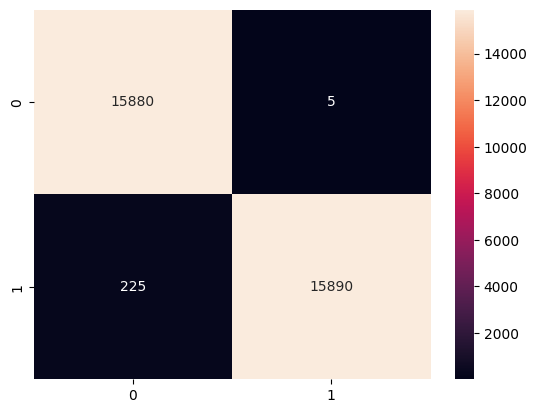

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize RandomForestClassifier with class_weight set to 'balanced'
rf = RandomForestClassifier(n_estimators=300,class_weight='balanced', random_state=42)

# Train the model using the training data
rf.fit(X_train_6, y_train_6)

# Make predictions on the test set
y_pred_6 = rf.predict(X_test_6)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test_6, y_pred_6))
evaluate_model(y_test_6, y_pred_6)

Accuracy: 0.97375
Precision: 0.993013326432915
Recall: 0.9544832732247233
F1 Score: 0.9733671528218135
AUC-ROC: 0.9738492506342237
MAE: 0.02625
RMSE: 0.1620185174601965


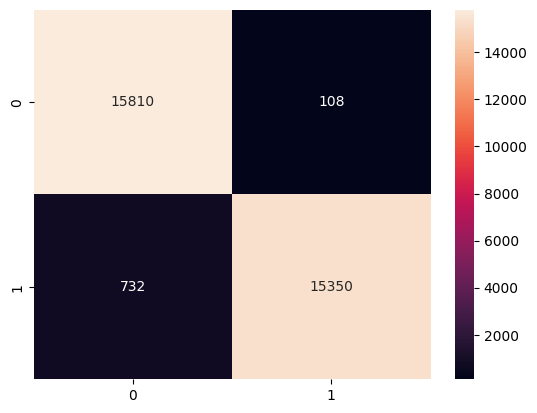

In [95]:
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_6, y_train_6)

# Make predictions and evaluate the model
xgb_y_pred_6 = xgb_model.predict(X_test_6)
evaluate_model(y_test_6, xgb_y_pred_6)

Decision Tree Test Accuracy: 0.68903125
Accuracy: 0.68903125
Precision: 0.7941962581137839
Recall: 0.516289171579274
F1 Score: 0.625775638373886
AUC-ROC: 0.6902818221761652
MAE: 0.31096875
RMSE: 0.5576457208658558


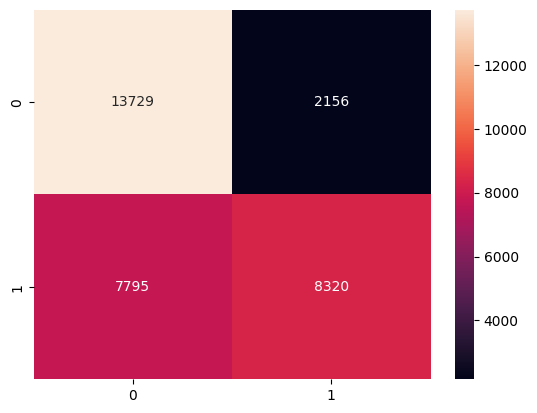

In [74]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_6, y_train_6)
dt_y_pred_6 = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test_6, dt_y_pred_6)
print("Decision Tree Test Accuracy:", dt_accuracy)
evaluate_model(y_test_6, dt_y_pred_6)

Logistic Regression Test Accuracy: 0.607875
Accuracy: 0.607875
Precision: 0.6097741121437804
Recall: 0.6147688488985418
F1 Score: 0.6122612941103763
AUC-ROC: 0.6078250917454623
MAE: 0.392125
RMSE: 0.6261988502065459


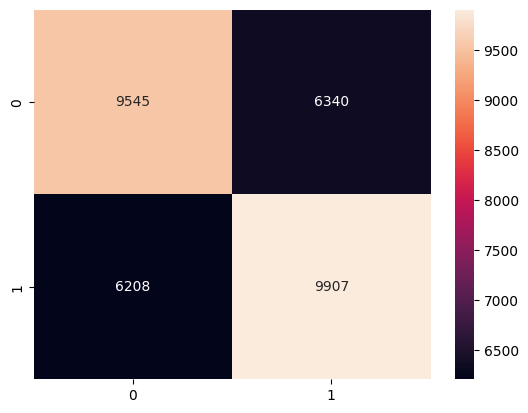

In [75]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_6, y_train_6)
lr_y_pred_6 = lr_model.predict(X_test_6)
lr_accuracy = accuracy_score(y_test_6, lr_y_pred_6)
print("Logistic Regression Test Accuracy:", lr_accuracy)
evaluate_model(y_test_6, lr_y_pred_6)

0:	learn: 0.6045690	test: 0.6037115	best: 0.6037115 (0)	total: 43.1ms	remaining: 2m 9s
10:	learn: 0.4428076	test: 0.4413312	best: 0.4413312 (10)	total: 469ms	remaining: 2m 7s
20:	learn: 0.3585588	test: 0.3582976	best: 0.3582976 (20)	total: 947ms	remaining: 2m 14s
30:	learn: 0.2938328	test: 0.2942480	best: 0.2942480 (30)	total: 1.42s	remaining: 2m 16s
40:	learn: 0.2560733	test: 0.2569597	best: 0.2569597 (40)	total: 1.84s	remaining: 2m 12s
50:	learn: 0.2224530	test: 0.2241607	best: 0.2241607 (50)	total: 2.25s	remaining: 2m 10s
60:	learn: 0.2078562	test: 0.2100312	best: 0.2100312 (60)	total: 2.66s	remaining: 2m 8s
70:	learn: 0.1944551	test: 0.1969931	best: 0.1969931 (70)	total: 3.07s	remaining: 2m 6s
80:	learn: 0.1797009	test: 0.1824532	best: 0.1824532 (80)	total: 3.5s	remaining: 2m 6s
90:	learn: 0.1704579	test: 0.1735725	best: 0.1735725 (90)	total: 3.91s	remaining: 2m 4s
100:	learn: 0.1557916	test: 0.1590133	best: 0.1590133 (100)	total: 4.32s	remaining: 2m 4s
110:	learn: 0.1456165	test: 

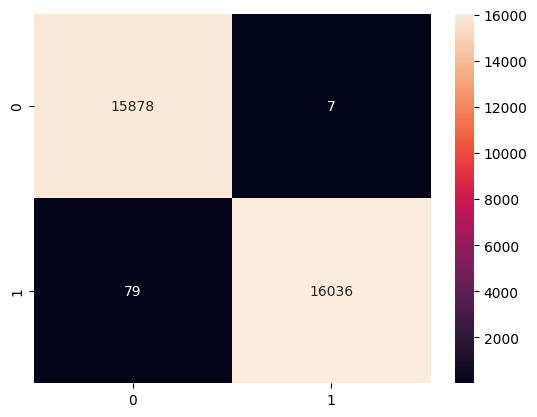

In [76]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=3000,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    verbose=10,
    random_seed=42
)

# Train CatBoost on the autoencoder embeddings
cat_model.fit(X_train_6, y_train_6, eval_set=(X_test_6, y_test_6))

# Make predictions on the test embeddings
y_cat_pred_6 = cat_model.predict(X_test_6)

# Evaluate the model's performance
evaluate_model(y_test_6, y_cat_pred_6)